we will: 
    1. Discuss different variable types, and techniques of “one-hot-encoding” our factor variables 
    2. Build a variable selection function that performs an exhaustive feature search overall all possible combinations of predictors 


In [2]:
import sys
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 999)
pd.set_option('display.width', 500)
pd.set_option('display.notebook_repr_html', True)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics, datasets
from collections import Counter
import statsmodels.formula.api as sm
from statsmodels.api import OLS
from sklearn.linear_model import LinearRegression
%matplotlib inline


In this part we’ll be using logistic regression to predict the likelihood of different passengers surviving the titanic disaster. We have not discussed logistic regression much in class, but for now it’s enough to know that logistic regression is typically preferable to linear regression when the outcome variable we’re predicting falls into discreet categories (in this case survived or didn’t survived) rather than a continuous range. 


In [3]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic = titanic[['sex', 'age', 'fare', 'class', 'survived']]
titanic.columns = ['sex', 'age', 'fare', 'pclass', 'survived']

In [5]:
titanic = titanic.dropna()
titanic.head()

,sex,age,fare,pclass,survived
0,male,22.0,7.2500,Third,0
1,female,38.0,71.2833,First,1
2,female,26.0,7.9250,Third,1
3,female,35.0,53.1000,First,1
4,male,35.0,8.0500,Third,0


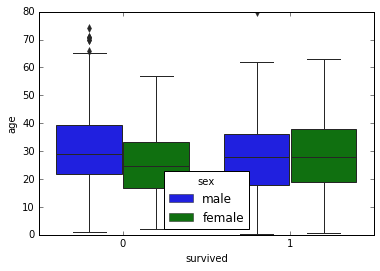

In [6]:
sns.boxplot(y="age",x="survived",hue="sex",data=titanic)

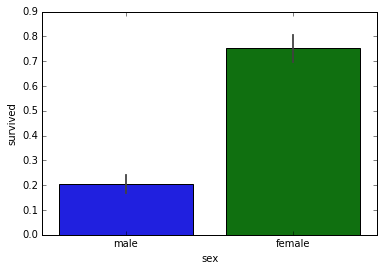

In [7]:
sns.barplot(x="sex", y="survived", data=titanic)
plt.show()

#### Define a series ‘is_female’, with 1s for women and 0s for men 

In [8]:
is_female = pd.get_dummies(titanic.sex)['female']
is_female.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: female, dtype: float64

#### "One hot encode" the passenger class column, and return a Dataframe with cols for 'First' , 'Second' . No Need of Third Column because of we are placing alredy 2 columns so if first and Second is 0 , 0  then Third is 1.

In [9]:
pd.get_dummies(titanic.pclass)

,First,Second,Third
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
6,1.0,0.0,0.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,0.0,1.0,0.0
10,0.0,0.0,1.0


In [10]:
pclass_coded = pd.get_dummies(titanic.pclass)[['First','Second']]
pclass_coded.head()

,First,Second
0,0.0,0.0
1,1.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,0.0


#### Making a dataframe with the encoded columns, plus 'age', 'fare' and 'survived' from the original dataframe. 

In [11]:
titanic_data = pd.concat([is_female,pclass_coded,titanic[['age','fare','survived']]],axis=1)
titanic_data.head()

,female,First,Second,age,fare,survived
0,0.0,0.0,0.0,22.0,7.2500,0
1,1.0,1.0,0.0,38.0,71.2833,1
2,1.0,0.0,0.0,26.0,7.9250,1
3,1.0,1.0,0.0,35.0,53.1000,1
4,0.0,0.0,0.0,35.0,8.0500,0


####  Using train_test_split to divided our dataset in a 70% training set, and a 30% testing set. 

In [12]:
train, test =  train_test_split(titanic_data, test_size=.3, random_state=123)

#### logistic regression model using statmodel

In [13]:
model = sm.logit(formula="survived ~ female + First + Second + age + fare", data=train)
model = model.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.447960
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  499
Model:                          Logit   Df Residuals:                      493
Method:                           MLE   Df Model:                            5
Date:                Wed, 01 Nov 2017   Pseudo R-squ.:                  0.3392
Time:                        12:48:05   Log-Likelihood:                -223.53
converged:                       True   LL-Null:                       -338.26
                                        LLR p-value:                 1.402e-47
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.5454      0.309     -5.006      0.000        -2.151    -0.940
female         2.6604      0.254     10.473      0.000         2.163     3.158
First          2.3722      0.384      6.173      0.000         1.619     3.125
Second         1.1224      0.297      3.782      0.000         0.541     1.704
age           -0.0282      0.009     -2.999      0.003        -0.047    -0.010
fare           0.0015      0.003      0.597      0.551        -0.003     0.006
==============================================================================
"""

##### it Seems to be 'fare' Predictor is not did good job in fitting.

(0, 300)

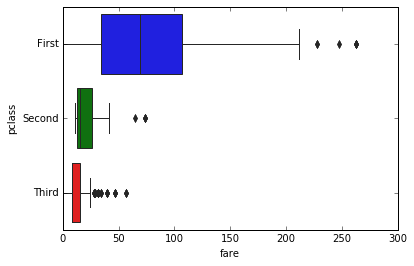

In [14]:
ax = sns.boxplot(titanic.fare,titanic.pclass)
ax.set_xlim([0,300])

##### it is highly correlated with Class

In [15]:
model = sm.logit(formula="survived ~ female + First + Second + age", data=train)
model = model.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.448332
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  499
Model:                          Logit   Df Residuals:                      494
Method:                           MLE   Df Model:                            4
Date:                Wed, 01 Nov 2017   Pseudo R-squ.:                  0.3386
Time:                        12:48:05   Log-Likelihood:                -223.72
converged:                       True   LL-Null:                       -338.26
                                        LLR p-value:                 2.083e-48
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.5076      0.302     -4.991      0.000        -2.100    -0.916
female         2.6712      0.253     10.545      0.000         2.175     3.168
First          2.4929      0.329      7.579      0.000         1.848     3.138
Second         1.1432      0.295      3.871      0.000         0.564     1.722
age           -0.0291      0.009     -3.144      0.002        -0.047    -0.011
==============================================================================
"""

In [16]:
predicted = np.round(model.predict(test[['female','First','Second','age']]))
expected = test['survived']
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       0.81      0.80      0.81       131
          1       0.70      0.71      0.71        84

avg / total       0.77      0.77      0.77       215



In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(expected, predicted, labels=None, sample_weight=None)

array([[105,  26],
       [ 24,  60]], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(expected, predicted)

0.76744186046511631

TN = 105 TP = 60 FN = 24 FP = 26 so we have High amout of FP and FN 

In [18]:
model.bic

478.4979239947491

In [19]:
titanic_so = sns.load_dataset("titanic")
titanic_so = titanic_so[['sex', 'age', 'fare', 'class', 'survived','alone','embarked','sibsp']]
titanic_so = titanic_so.dropna()

In [20]:
tit_alone = pd.get_dummies(titanic_so.alone)[False]

In [21]:
emb = pd.get_dummies(titanic_so.embarked)[['C','Q']]

In [22]:
titanic_data3 = pd.concat([is_female,pclass_coded,tit_alone,emb,titanic_so[['age','fare','survived']]],axis=1)
titanic_data3.head()

,female,First,Second,False,C,Q,age,fare,survived
0,0.0,0.0,0.0,1.0,0.0,0.0,22.0,7.2500,0.0
1,1.0,1.0,0.0,1.0,1.0,0.0,38.0,71.2833,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,26.0,7.9250,1.0
3,1.0,1.0,0.0,1.0,0.0,0.0,35.0,53.1000,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,35.0,8.0500,0.0


In [23]:
titanic_data3.columns = ['female', 'First', 'Second', 'alone', 'C', 'Q', 'age', 'fare', 'survived']

In [24]:
train_so, test_so =  train_test_split(titanic_data3, test_size=.2, random_state=123)

In [25]:
train_so

,female,First,Second,alone,C,Q,age,fare,survived
212,0.0,0.0,0.0,0.0,0.0,0.0,22.00,7.2500,0.0
281,0.0,0.0,0.0,0.0,0.0,0.0,28.00,7.8542,0.0
190,1.0,0.0,1.0,0.0,0.0,0.0,32.00,13.0000,1.0
860,0.0,0.0,0.0,1.0,0.0,0.0,41.00,14.1083,0.0
204,0.0,0.0,0.0,0.0,0.0,0.0,18.00,8.0500,1.0
370,0.0,1.0,0.0,1.0,1.0,0.0,25.00,55.4417,1.0
40,1.0,0.0,0.0,1.0,0.0,0.0,40.00,9.4750,0.0
701,0.0,1.0,0.0,0.0,0.0,0.0,35.00,26.2875,1.0
879,1.0,1.0,0.0,1.0,1.0,0.0,56.00,83.1583,1.0
722,0.0,0.0,1.0,0.0,0.0,0.0,34.00,13.0000,0.0


In [27]:
model = sm.logit(formula="survived ~ female + First + Second + age + alone", data=train_so)
model = model.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.444849
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  569
Model:                          Logit   Df Residuals:                      563
Method:                           MLE   Df Model:                            5
Date:                Wed, 01 Nov 2017   Pseudo R-squ.:                  0.3420
Time:                        12:49:03   Log-Likelihood:                -253.12
converged:                       True   LL-Null:                       -384.66
                                        LLR p-value:                 8.586e-55
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.4035      0.311     -4.508      0.000        -2.014    -0.793
female         2.6302      0.242     10.863      0.000         2.156     3.105
First          2.5607      0.319      8.026      0.000         1.935     3.186
Second         1.1343      0.279      4.063      0.000         0.587     1.681
age           -0.0353      0.009     -3.949      0.000        -0.053    -0.018
alone          0.1070      0.231      0.462      0.644        -0.346     0.560
==============================================================================
"""

In [28]:
model.bic

544.3017172738505

In [47]:

'survived ~ ' + (' + ').join(titanic_data3.columns)

'survived ~ female + First + Second + alone + C + Q + age + fare + survived'

In [ ]:
accuracy_score(expected, predicted)

In [59]:
import itertools

def search_selection(x, y):
    d = x.shape[1]
    predictors = x.columns
    overall_min_bic = 10000 # A big number 
    output = dict()
    for k in range(1,d):    
        max_score = -10000 # A small number    
        subsets_k = itertools.combinations(predictors, k) 
        for subset in subsets_k:          
            features = list(subset)
            string_input = 'survived ~ ' + (' + ').join(features)       
            model_fit = sm.logit(formula=string_input, data= x )
            try: 
                results = model_fit.fit()
                bic = results.bic
                predicted_fit = np.round(results.predict(test_so[features]))
                expected_fit = test_so['survived']
                acc_score = accuracy_score(expected_fit, predicted_fit)
                if(acc_score > max_score):
                    max_score = acc_score
                    best_subset = features
                    best_model = model_fit
                    best_formula = "y ~ " + (' + '.join(features))  
            except:
                pass
        #print("For k={0} the best model is {1} with bic={2:.2f} and R^2={3:.4f}".format(k,best_formula,bic,results.rsquared))
        output[k] = {'best_model':best_formula, 'bic':bic , 'accuracy':max_score }
    
    return pd.DataFrame(output).T  

In [60]:
data_f = search_selection(train_so, test_so)

Optimization terminated successfully.
         Current function value: 0.517132
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626495
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.673724
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.651299
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.649409
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.674430
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.674033
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.626561
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.471651
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.516844
  

In [61]:
data_f

,accuracy,best_model,bic
1,0.748252,y ~ female,725.715
2,0.748252,y ~ female + First,726.362
3,0.748252,y ~ female + First + Second,731.621
4,0.755245,y ~ female + First + Second + Q,727.16
5,0.762238,y ~ female + First + Second + C + age,727.236
6,0.769231,y ~ female + First + Second + C + Q + age,723.213
7,0.769231,y ~ female + First + Second + alone + C + Q + age,693.959
8,0.769231,y ~ female + First + Second + alone + C + Q + ...,557.881
